# Média geométrica para array

\begin{equation}
Geometric mean = \sqrt[n]{x_1 * x_2 * x_3 * ... * x_n}
\end{equation}

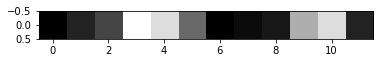

In [19]:
import numpy as np
import matplotlib.pyplot as plt

n = 3 #tamanho do fitro
num_cols = 12
img_1D = [[10, 40, 70, 230, 200, 100, 10, 20, 30, 160, 200, 40]]
plt.imshow(img_1D, 'gray')

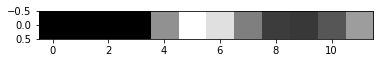

In [37]:
# Cria imagem com zeros ao redor da borda
img_1D_padded = np.zeros((1, num_cols+n-1))

for col in range(num_cols):   
    img_1D_padded[0, col+1] = img_1D[0][col]
    
plt.imshow(img_1D_padded, 'gray')

for col in range(num_cols):
    produtorio = img_1D_padded[0, col-1]*img_1D_padded[0, col]*img_1D_padded[0, col+1]
    img_1D[0][col] = produtorio**(1/n)

plt.imshow(img_1D, 'gray')

# Média geométrica para imagem 2D
\begin{equation}
G(x, y) = \left[ \prod_{i, j \in S} S(i, j) \right]^{\frac{1}{mn}}
\end{equation}

In [63]:
def geometric_mean(img, f_num_rows, f_num_cols):
    '''Aplica o filtro de média geométrica na imagem.
    
       Parâmetros
       ----------
       img : numpy array.
             Imagem a ser filtrada.
             
       f_num_rows : numero de linhas para o filtro
       f_num_cols : numero de colunas para o filtro
       
       Return
       -------
       img_filtered : numpy array, mesmo tamanho que img
                      Imagem filtrada
    '''

    half_r_size = f_num_rows//2
    half_c_size = f_num_cols//2

    # imagem com bordinha
    # a borda é preenchida com os valores dos cantos do numpy array
    # não é com 0 porque o 0 zera todo o produtório da região
    img_padded = np.pad(img, ((half_r_size,half_r_size),(half_c_size,half_c_size)), mode='edge')
    plt.imshow(img_padded,'gray')

    img_filtered = np.zeros((num_rows, num_cols))

    for row in range(num_rows):
        for col in range(num_cols):

            prod_region = 1 # termo neutro na multiplicação

            for s in range(f_num_rows):
                for t in range(f_num_cols):
                    prod_region *= int(img_padded[row+s, col+t])

            prod_region = int(prod_region**(1/(f_num_rows*f_num_cols)))

            img_filtered[row, col] = prod_region
            
    return img_filtered

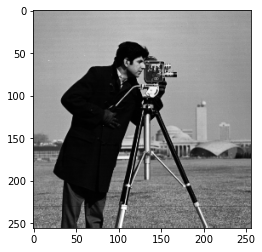

In [64]:
img = plt.imread('cameraman.tiff')
plt.imshow(img, cmap='gray')
num_rows, num_cols = img.shape

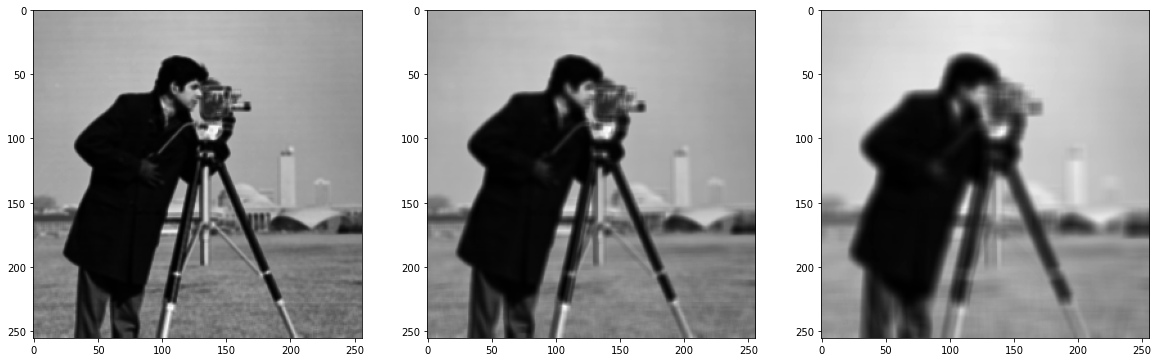

In [72]:
plt.figure(figsize=[20, 20])

plt.subplot(1, 3, 1)
img_filtered = geometric_mean(img, 3, 3)
plt.imshow(img_filtered, 'gray')

plt.subplot(1, 3, 2)
img_filtered = geometric_mean(img, 5, 5)
plt.imshow(img_filtered, 'gray')

plt.subplot(1, 3, 3)
img_filtered = geometric_mean(img, 10, 10)
plt.imshow(img_filtered, 'gray')